In [1]:
using Revise
using Plots
using LaTeXStrings
using LinearAlgebra
using SparseIR
using Nevanlinna

In [2]:
# Set work data Type
T = BigFloat
setprecision(128)
;

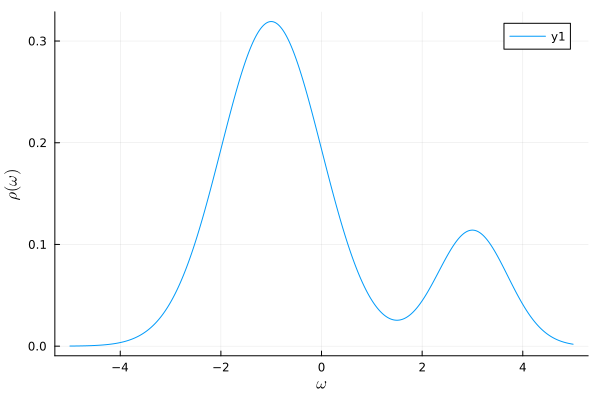

In [3]:
#define spectral function
gaussian(x, mu, sigma) = exp(-0.5*((x-mu)/sigma)^2)/(sqrt(2*π)*sigma)
rho(omega) = 0.8*gaussian(omega, -1.0, 1.0) + 0.2*gaussian(omega, 3, 0.7)
omegas = LinRange(-5, 5, 1000)
plot()
plot!(omegas, rho.(omegas), xlabel=latexstring("\\omega"), ylabel=latexstring("\\rho(\\omega)"))

In [4]:
function generate_input_data(rho::Function, beta::Float64)
    lambda = 1e+4
    wmax = lambda/beta
    basis = FiniteTempBasisSet(beta, wmax, 1e-15)

    rhol = [overlap(basis.basis_f.v[l], rho) for l in 1:length(basis.basis_f)]
    gl = - basis.basis_f.s .* rhol
    gw = evaluate(basis.smpl_wn_f, gl)
    
    hnw = length(basis.smpl_wn_f.sampling_points)÷2
    
    input_smpl = Array{Complex{T}}(undef, hnw) 
    input_gw   = Array{Complex{T}}(undef, hnw) 
    
    for i in 1:hnw
        input_smpl[i]= SparseIR.valueim(basis.smpl_wn_f.sampling_points[hnw+i], beta)
        input_gw[i]  = gw[hnw+i]
    end
    
    return input_smpl, input_gw
end

generate_input_data (generic function with 1 method)

In [5]:
beta = 100. #inverse temperature
input_smpl, input_gw = generate_input_data(rho, beta)
;

In [6]:
f64_input_smpl = ComplexF64.(input_smpl)
f64_input_gw   = ComplexF64.(input_gw)
;

In [7]:
N_real    = 1000  #demension of array of output
omega_max = 10.0  #energy cutoff of real axis
eta       = 0.001 #broaden parameter 
sum_rule  = 1.0   #sum rule
H_max     = 50    #cutoff of Hardy basis
lambda    = 1e-4  #regularization parameter
iter_tol  = 1000  #upper bound of iteration
;

In [8]:
#construct solver struct
@time sol     = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true)
@time f64_sol = Nevanlinna.NevanlinnaSolver(f64_input_smpl, f64_input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true)
;

N_imag is setted as 31
H=1
Iter     Function value   Gradient norm 
     0     9.050531e-01     5.094001e+00
 * time: 0.01765894889831543
     1     8.152167e-01     3.982333e+00
 * time: 1.3106460571289062
     2     4.035779e-01     5.450129e+00
 * time: 1.5160040855407715
     3     1.910854e-01     2.158235e+00
 * time: 1.6355769634246826
     4     1.565320e-01     2.165017e-01
 * time: 1.7706279754638672
     5     1.561898e-01     1.834678e-02
 * time: 1.9807229042053223
     6     1.561841e-01     4.391178e-03
 * time: 2.183242082595825
     7     1.561839e-01     1.240366e-03
 * time: 2.374290943145752
     8     1.561839e-01     3.309993e-04
 * time: 2.5162410736083984
     9     1.561839e-01     3.492742e-05
 * time: 2.6382129192352295
    10     1.561839e-01     5.151171e-06
 * time: 2.808011054992676
    11     1.561839e-01     1.124102e-06
 * time: 3.013139009475708
    12     1.561839e-01     2.750608e-07
 * time: 3.2198100090026855
    13     1.561839e-01     2.953443e-

In [9]:
#execute optimize
@time Nevanlinna.solve!(sol)
@time Nevanlinna.solve!(f64_sol)

H=1
Iter     Function value   Gradient norm 
     0     1.561839e-01     6.243122e-09
 * time: 0.00020503997802734375
max_theta=0.1628134357327177670612707285767895569134
hardy optimization was success.
H=2
Iter     Function value   Gradient norm 
     0     1.561839e-01     1.233090e+00
 * time: 5.602836608886719e-5
     1     1.498561e-01     8.958772e-01
 * time: 0.18442416191101074
     2     1.400685e-01     9.291370e-01
 * time: 0.3474709987640381
     3     1.210241e-01     9.342923e-01
 * time: 0.6083321571350098
     4     3.871618e-02     7.831022e-01
 * time: 0.8356871604919434
     5     3.000783e-02     3.820936e-01
 * time: 1.094123125076294
     6     2.746334e-02     1.020176e-01
 * time: 1.3034720420837402
     7     2.727185e-02     1.662435e-02
 * time: 1.5460991859436035
     8     2.726284e-02     8.507493e-03
 * time: 1.76170015335083
     9     2.726204e-02     2.783118e-03
 * time: 1.9403071403503418
    10     2.726197e-02     9.027024e-04
 * time: 2.1885449886

    12     2.378011e-04     3.730892e-03
 * time: 3.319652795791626
    13     2.366565e-04     6.101081e-03
 * time: 3.6762118339538574
    14     2.356797e-04     8.083295e-03
 * time: 4.030604839324951
    15     2.339290e-04     6.693717e-03
 * time: 4.380999803543091
    16     2.326995e-04     5.773034e-03
 * time: 4.716261863708496
    17     2.306008e-04     6.514913e-03
 * time: 5.094738006591797
    18     2.296039e-04     6.647206e-03
 * time: 5.453324794769287
    19     2.290375e-04     4.212432e-03
 * time: 5.838764905929565
    20     2.287212e-04     1.109249e-03
 * time: 6.295892953872681
    21     2.286187e-04     2.391163e-03
 * time: 6.727420806884766
    22     2.284418e-04     3.690695e-03
 * time: 7.0984108448028564
    23     2.280147e-04     6.860283e-03
 * time: 7.469675779342651
    24     2.272074e-04     1.086931e-02
 * time: 7.880908012390137
    25     2.254325e-04     1.564949e-02
 * time: 8.277160882949829
    26     2.228912e-04     1.553435e-02
 * ti

    33     4.059631e-05     4.151182e-04
 * time: 12.343906879425049
    34     4.059241e-05     2.419244e-04
 * time: 12.769474029541016
    35     4.058992e-05     3.740099e-04
 * time: 13.269021034240723
    36     4.058567e-05     5.972880e-04
 * time: 13.711832046508789
    37     4.057994e-05     8.888270e-04
 * time: 14.128038883209229
    38     4.056834e-05     1.392476e-03
 * time: 14.547425031661987
    39     4.055144e-05     1.919555e-03
 * time: 14.966171979904175
    40     4.051990e-05     2.711315e-03
 * time: 15.402559995651245
    41     4.047443e-05     3.528629e-03
 * time: 15.817114114761353
    42     4.039079e-05     4.755943e-03
 * time: 16.40020990371704
    43     4.027028e-05     5.942051e-03
 * time: 17.01049494743347
    44     4.005836e-05     7.356686e-03
 * time: 17.683089017868042
    45     3.973943e-05     8.420428e-03
 * time: 18.17197299003601
    46     3.919065e-05     7.791129e-03
 * time: 18.61190700531006
    47     3.841913e-05     2.406561e-

     5     2.555648e-05     8.172183e-04
 * time: 1.637012004852295
     6     2.550712e-05     9.443838e-04
 * time: 1.9265379905700684
     7     2.546863e-05     8.057346e-04
 * time: 2.2657999992370605
     8     2.539669e-05     1.113988e-03
 * time: 2.580348014831543
     9     2.532277e-05     1.010624e-03
 * time: 2.9160470962524414
    10     2.526056e-05     1.254672e-03
 * time: 3.205878973007202
    11     2.503606e-05     1.040183e-03
 * time: 3.53170108795166
    12     2.497802e-05     4.998467e-04
 * time: 3.8262391090393066
    13     2.476523e-05     1.989261e-03
 * time: 4.374385118484497
    14     2.461190e-05     2.974824e-03
 * time: 4.6866209506988525
    15     2.438244e-05     2.034340e-03
 * time: 5.067305088043213
    16     2.431678e-05     1.288254e-03
 * time: 5.371827125549316
    17     2.428218e-05     1.351380e-03
 * time: 5.8624889850616455
    18     2.425651e-05     8.778523e-04
 * time: 6.372113943099976
    19     2.423529e-05     1.020824e-03
 *

    32     2.103339e-05     3.164093e-04
 * time: 14.640237092971802
    33     2.102645e-05     5.586496e-04
 * time: 15.161087989807129
    34     2.102017e-05     7.588975e-04
 * time: 15.704890966415405
    35     2.100881e-05     1.000606e-03
 * time: 16.212929010391235
    36     2.099950e-05     1.015121e-03
 * time: 16.716683864593506
    37     2.098483e-05     7.639061e-04
 * time: 17.375468015670776
    38     2.096523e-05     5.088268e-04
 * time: 17.88436794281006
    39     2.096231e-05     2.746110e-04
 * time: 18.26500701904297
    40     2.095740e-05     4.384250e-04
 * time: 18.774232864379883
    41     2.095086e-05     8.647827e-04
 * time: 19.27609896659851
    42     2.093776e-05     1.140938e-03
 * time: 19.77455997467041
    43     2.092273e-05     1.458979e-03
 * time: 20.316312074661255
    44     2.090319e-05     1.852408e-03
 * time: 20.827369928359985
    45     2.087960e-05     2.174322e-03
 * time: 21.322288990020752
    46     2.084664e-05     2.241121e-

    31     2.016846e-05     3.802861e-04
 * time: 16.52655005455017
    32     2.016407e-05     3.682996e-04
 * time: 17.28053092956543
    33     2.016291e-05     1.077828e-04
 * time: 17.750822067260742
    34     2.016195e-05     1.921740e-04
 * time: 18.491388082504272
    35     2.016138e-05     2.291019e-04
 * time: 19.15593194961548
    36     2.016019e-05     3.472162e-04
 * time: 19.683319091796875
    37     2.015931e-05     3.445477e-04
 * time: 20.25248908996582
    38     2.015768e-05     3.594473e-04
 * time: 20.771332025527954
    39     2.015548e-05     3.448482e-04
 * time: 21.354433059692383
    40     2.015089e-05     2.298837e-04
 * time: 21.880847930908203
    41     2.015003e-05     1.778016e-04
 * time: 22.42408299446106
    42     2.014916e-05     1.707548e-04
 * time: 23.044898986816406
    43     2.014864e-05     2.781427e-04
 * time: 23.622946977615356
    44     2.014750e-05     3.084243e-04
 * time: 24.194376945495605
    45     2.014659e-05     3.592103e-0

    13     1.989808e-05     1.155012e-04
 * time: 5.398852825164795
    14     1.989643e-05     1.082665e-04
 * time: 5.757091999053955
    15     1.989558e-05     1.617414e-04
 * time: 6.169597864151001
    16     1.989408e-05     8.153297e-05
 * time: 6.54790186882019
    17     1.989029e-05     3.124854e-04
 * time: 7.1899449825286865
    18     1.988924e-05     2.580992e-04
 * time: 7.619729042053223
    19     1.988805e-05     1.972197e-04
 * time: 7.985692024230957
    20     1.988617e-05     1.860153e-04
 * time: 8.628412961959839
    21     1.988217e-05     1.431631e-04
 * time: 9.21144700050354
    22     1.988023e-05     2.702350e-04
 * time: 9.808796882629395
    23     1.987812e-05     3.286846e-04
 * time: 10.455024003982544
    24     1.987606e-05     8.009561e-05
 * time: 11.033119916915894
    25     1.987538e-05     1.489337e-04
 * time: 11.709794044494629
    26     1.987385e-05     2.771513e-04
 * time: 12.446441888809204
    27     1.987189e-05     1.778556e-04
 * t

   133     1.980658e-05     1.003435e-04
 * time: 69.70597100257874
   134     1.980657e-05     1.050498e-04
 * time: 70.0660388469696
   135     1.980654e-05     1.257090e-04
 * time: 70.67698884010315
   136     1.980652e-05     1.314896e-04
 * time: 71.03224992752075
   137     1.980648e-05     1.568936e-04
 * time: 71.65891003608704
   138     1.980645e-05     1.639468e-04
 * time: 72.04532384872437
   139     1.980639e-05     1.952474e-04
 * time: 72.66095685958862
   140     1.980633e-05     2.038193e-04
 * time: 73.01345300674438
   141     1.980625e-05     2.424217e-04
 * time: 73.65649890899658
   142     1.980616e-05     2.527668e-04
 * time: 74.00360202789307
   143     1.980603e-05     3.003928e-04
 * time: 74.62893104553223
   144     1.980590e-05     3.127697e-04
 * time: 74.98221492767334
   145     1.980570e-05     3.715445e-04
 * time: 75.60613083839417
   146     1.980550e-05     3.861992e-04
 * time: 76.00805687904358
   147     1.980518e-05     4.586767e-04
 * time:

    72     1.975461e-05     9.829662e-05
 * time: 40.545604944229126
    73     1.975457e-05     9.961502e-05
 * time: 41.07845091819763
    74     1.975451e-05     1.299836e-04
 * time: 41.809191942214966
    75     1.975446e-05     1.331141e-04
 * time: 42.27092981338501
    76     1.975437e-05     1.631202e-04
 * time: 42.85981488227844
    77     1.975431e-05     1.666103e-04
 * time: 43.30906701087952
    78     1.975419e-05     1.962543e-04
 * time: 43.895829916000366
    79     1.975409e-05     1.989250e-04
 * time: 44.32021689414978
    80     1.975388e-05     2.142610e-04
 * time: 44.96225094795227
    81     1.975356e-05     1.970096e-04
 * time: 45.544076919555664
    82     1.975269e-05     1.648043e-04
 * time: 46.18555402755737
    83     1.975253e-05     4.197189e-05
 * time: 46.59018087387085
    84     1.975248e-05     2.481933e-05
 * time: 47.23062491416931
    85     1.975247e-05     2.593188e-05
 * time: 47.61050200462341
    86     1.975247e-05     1.420466e-05
 * 

   193     1.974037e-05     1.625752e-04
 * time: 94.18084597587585
   194     1.974034e-05     1.797540e-04
 * time: 94.59220385551453
   195     1.974031e-05     1.879650e-04
 * time: 95.0234010219574
   196     1.974027e-05     2.079243e-04
 * time: 95.39221692085266
   197     1.974023e-05     2.172133e-04
 * time: 95.81992292404175
   198     1.974017e-05     2.404467e-04
 * time: 96.23456597328186
   199     1.974011e-05     2.509166e-04
 * time: 96.61523199081421
   200     1.974004e-05     2.780212e-04
 * time: 97.23517894744873
   201     1.973996e-05     2.897660e-04
 * time: 97.65663194656372
   202     1.973986e-05     3.214682e-04
 * time: 98.22962379455566
   203     1.973975e-05     3.345568e-04
 * time: 98.64631485939026
   204     1.973961e-05     3.717388e-04
 * time: 99.2138500213623
   205     1.973946e-05     3.861794e-04
 * time: 99.65437197685242
   206     1.973925e-05     4.298765e-04
 * time: 100.24591994285583
   207     1.973903e-05     4.455243e-04
 * time:

    71     1.971939e-05     7.424765e-05
 * time: 42.51165294647217
    72     1.971935e-05     9.313787e-05
 * time: 43.28085708618164
    73     1.971933e-05     9.530144e-05
 * time: 43.82207107543945
    74     1.971928e-05     1.084960e-04
 * time: 44.587738037109375
    75     1.971924e-05     1.086208e-04
 * time: 45.246220111846924
    76     1.971914e-05     1.126686e-04
 * time: 46.03408598899841
    77     1.971890e-05     8.164270e-05
 * time: 47.03501605987549
    78     1.971882e-05     7.738308e-05
 * time: 47.55252408981323
    79     1.971877e-05     3.209583e-05
 * time: 48.08280110359192
    80     1.971875e-05     1.799463e-05
 * time: 48.4718279838562
    81     1.971875e-05     1.269269e-05
 * time: 48.9803581237793
    82     1.971874e-05     2.418621e-05
 * time: 49.60197591781616
    83     1.971873e-05     1.887336e-05
 * time: 50.08117198944092
    84     1.971873e-05     2.757519e-05
 * time: 50.80560302734375
    85     1.971872e-05     2.667397e-05
 * time

   192     1.971372e-05     7.658742e-05
 * time: 111.37893104553223
   193     1.971370e-05     9.624506e-05
 * time: 112.05816698074341
   194     1.971369e-05     9.415769e-05
 * time: 112.45346307754517
   195     1.971366e-05     1.182999e-04
 * time: 113.74587607383728
   196     1.971364e-05     1.156085e-04
 * time: 114.53172707557678
   197     1.971360e-05     1.452288e-04
 * time: 115.18410611152649
   198     1.971357e-05     1.417561e-04
 * time: 115.65094804763794
   199     1.971350e-05     1.783767e-04
 * time: 116.26607203483582
   200     1.971346e-05     1.738882e-04
 * time: 116.70608496665955
   201     1.971336e-05     2.182799e-04
 * time: 117.39058804512024
   202     1.971329e-05     2.123716e-04
 * time: 117.78220701217651
   203     1.971313e-05     2.669262e-04
 * time: 118.44591307640076
   204     1.971302e-05     2.593067e-04
 * time: 118.91982793807983
   205     1.971276e-05     3.223572e-04
 * time: 119.61754608154297
   206     1.971259e-05     3.1282

    72     1.970386e-05     3.360544e-05
 * time: 43.33915996551514
    73     1.970384e-05     4.483175e-05
 * time: 43.966925859451294
    74     1.970380e-05     3.908518e-05
 * time: 44.94658398628235
    75     1.970379e-05     2.327730e-05
 * time: 45.36850190162659
    76     1.970378e-05     2.758001e-05
 * time: 45.82210397720337
    77     1.970378e-05     3.014835e-06
 * time: 46.3031849861145
    78     1.970377e-05     1.878577e-05
 * time: 46.98409295082092
    79     1.970377e-05     5.955300e-06
 * time: 47.48312187194824
    80     1.970376e-05     2.123772e-05
 * time: 48.19618797302246
    81     1.970376e-05     1.120696e-05
 * time: 48.60640001296997
    82     1.970376e-05     2.566990e-05
 * time: 49.29612183570862
    83     1.970376e-05     1.926218e-05
 * time: 49.780234813690186
    84     1.970375e-05     3.098848e-05
 * time: 50.41817879676819
    85     1.970375e-05     2.456605e-05
 * time: 50.88564586639404
    86     1.970374e-05     3.582614e-05
 * tim

   193     1.970125e-05     1.945712e-06
 * time: 122.47266101837158
   194     1.970125e-05     9.926111e-07
 * time: 122.9446849822998
   195     1.970125e-05     9.964444e-07
 * time: 123.57740879058838
   196     1.970125e-05     4.616665e-07
 * time: 124.03295278549194
   197     1.970125e-05     6.340689e-07
 * time: 124.73017191886902
   198     1.970125e-05     1.574110e-07
 * time: 125.13913989067078
   199     1.970125e-05     4.885970e-07
 * time: 125.84646391868591
   200     1.970125e-05     2.294142e-07
 * time: 126.31793189048767
   201     1.970125e-05     5.606996e-07
 * time: 126.96089887619019
   202     1.970125e-05     4.338513e-07
 * time: 127.4219229221344
   203     1.970125e-05     7.841357e-07
 * time: 128.12647199630737
   204     1.970125e-05     6.523608e-07
 * time: 128.54993200302124
   205     1.970125e-05     1.038676e-06
 * time: 129.33984684944153
   206     1.970125e-05     9.023835e-07
 * time: 129.8319067955017
   207     1.970125e-05     1.334706e

    12     1.969639e-05     3.213118e-05
 * time: 5.828078985214233
    13     1.969637e-05     2.161897e-05
 * time: 6.335515975952148
    14     1.969634e-05     2.145657e-05
 * time: 6.77203106880188
    15     1.969631e-05     2.070661e-05
 * time: 7.250836133956909
    16     1.969627e-05     3.033159e-05
 * time: 7.737089157104492
    17     1.969623e-05     1.812576e-05
 * time: 8.22916293144226
    18     1.969620e-05     2.299503e-05
 * time: 8.662014961242676
    19     1.969617e-05     1.723354e-05
 * time: 9.128766059875488
    20     1.969611e-05     2.685696e-05
 * time: 9.614068984985352
    21     1.969605e-05     1.728007e-05
 * time: 10.362344980239868
    22     1.969602e-05     3.212026e-05
 * time: 10.796769142150879
    23     1.969597e-05     8.290712e-05
 * time: 11.283705949783325
    24     1.969591e-05     3.680545e-05
 * time: 11.782433032989502
    25     1.969579e-05     2.753976e-05
 * time: 12.505856037139893
    26     1.969577e-05     2.133955e-05
 * t

   133     1.969396e-05     8.038489e-06
 * time: 83.26234412193298
   134     1.969396e-05     9.102646e-06
 * time: 83.75913214683533
   135     1.969396e-05     9.833358e-06
 * time: 84.20066714286804
   136     1.969396e-05     1.093748e-05
 * time: 84.7422239780426
   137     1.969396e-05     1.178942e-05
 * time: 85.31160497665405
   138     1.969396e-05     1.290524e-05
 * time: 85.87575101852417
   139     1.969396e-05     1.387880e-05
 * time: 86.3675811290741
   140     1.969396e-05     1.503842e-05
 * time: 86.83502197265625
   141     1.969396e-05     1.612081e-05
 * time: 87.33480405807495
   142     1.969395e-05     1.734672e-05
 * time: 87.8231680393219
   143     1.969395e-05     1.849572e-05
 * time: 88.26194095611572
   144     1.969395e-05     1.978628e-05
 * time: 88.75385212898254
   145     1.969395e-05     2.098317e-05
 * time: 89.2630569934845
   146     1.969395e-05     2.233885e-05
 * time: 89.77478098869324
   147     1.969395e-05     2.359920e-05
 * time: 90

   253     1.969259e-05     2.684305e-05
 * time: 151.03478908538818
   254     1.969258e-05     2.600290e-05
 * time: 151.55383205413818
   255     1.969258e-05     3.070896e-05
 * time: 152.32011604309082
   256     1.969258e-05     2.977905e-05
 * time: 152.81784296035767
   257     1.969258e-05     3.505457e-05
 * time: 153.5046660900116
   258     1.969258e-05     3.401601e-05
 * time: 154.04115200042725
   259     1.969258e-05     3.995309e-05
 * time: 154.8257110118866
   260     1.969257e-05     3.878484e-05
 * time: 155.2661280632019
   261     1.969257e-05     4.543959e-05
 * time: 156.03338408470154
   262     1.969257e-05     4.411301e-05
 * time: 156.5591139793396
   263     1.969256e-05     5.158384e-05
 * time: 157.27456712722778
   264     1.969256e-05     5.009024e-05
 * time: 157.7527470588684
   265     1.969256e-05     5.846514e-05
 * time: 158.7234489917755
   266     1.969255e-05     5.678806e-05
 * time: 159.43071293830872
   267     1.969255e-05     6.611345e-05

   373     1.968964e-05     2.483047e-04
 * time: 229.22454714775085
   374     1.968941e-05     2.607882e-04
 * time: 230.18807411193848
   375     1.968865e-05     2.506647e-04
 * time: 231.08160614967346
   376     1.968659e-05     1.752179e-04
 * time: 232.56526803970337
   377     1.968638e-05     1.094759e-04
 * time: 233.1418960094452
   378     1.968599e-05     7.411465e-05
 * time: 233.7027690410614
   379     1.968595e-05     4.748423e-05
 * time: 234.21679615974426
   380     1.968592e-05     4.534310e-05
 * time: 235.02547097206116
   381     1.968591e-05     2.126344e-05
 * time: 235.47490310668945
   382     1.968589e-05     2.590530e-05
 * time: 236.3249180316925
   383     1.968589e-05     1.280857e-05
 * time: 236.85454106330872
   384     1.968589e-05     1.453962e-05
 * time: 237.56668615341187
   385     1.968589e-05     8.460770e-06
 * time: 238.05743312835693
   386     1.968588e-05     8.096696e-06
 * time: 238.9102280139923
   387     1.968588e-05     3.651142e-

    81     1.968288e-05     1.163883e-05
 * time: 57.538302183151245
    82     1.968288e-05     1.403906e-05
 * time: 58.28481316566467
    83     1.968288e-05     1.504116e-05
 * time: 58.821288108825684
    84     1.968287e-05     1.848860e-05
 * time: 59.71360516548157
    85     1.968287e-05     1.961730e-05
 * time: 60.266799211502075
    86     1.968287e-05     2.294985e-05
 * time: 61.04550504684448
    87     1.968287e-05     2.392270e-05
 * time: 61.606131076812744
    88     1.968286e-05     2.739516e-05
 * time: 62.4575891494751
    89     1.968286e-05     2.795871e-05
 * time: 62.94646120071411
    90     1.968285e-05     3.257727e-05
 * time: 63.76377511024475
    91     1.968285e-05     3.315617e-05
 * time: 64.31810307502747
    92     1.968285e-05     3.814719e-05
 * time: 65.12539505958557
    93     1.968284e-05     3.869847e-05
 * time: 65.5990149974823
    94     1.968284e-05     4.375800e-05
 * time: 66.4189522266388
    95     1.968283e-05     4.450804e-05
 * tim

   201     1.968172e-05     5.800177e-05
 * time: 136.90313816070557
   202     1.968171e-05     5.707918e-05
 * time: 137.38282799720764
   203     1.968171e-05     6.366812e-05
 * time: 138.1246612071991
   204     1.968170e-05     6.270207e-05
 * time: 138.61614608764648
   205     1.968170e-05     6.983318e-05
 * time: 139.3729271888733
   206     1.968169e-05     6.881440e-05
 * time: 139.88566303253174
   207     1.968169e-05     7.656296e-05
 * time: 140.6750750541687
   208     1.968168e-05     7.548417e-05
 * time: 141.26171708106995
   209     1.968167e-05     8.393200e-05
 * time: 141.9943811893463
   210     1.968167e-05     8.278149e-05
 * time: 142.54708909988403
   211     1.968166e-05     9.202339e-05
 * time: 143.36768412590027
   212     1.968165e-05     9.078611e-05
 * time: 143.8453450202942
   213     1.968164e-05     1.009422e-04
 * time: 144.56495308876038
   214     1.968163e-05     9.960329e-05
 * time: 145.05806517601013
   215     1.968161e-05     1.108326e-0

   321     1.967944e-05     2.355037e-05
 * time: 201.19887900352478
   322     1.967944e-05     2.366842e-05
 * time: 201.66540503501892
   323     1.967944e-05     2.505707e-05
 * time: 202.1511390209198
   324     1.967944e-05     2.518411e-05
 * time: 202.63985419273376
   325     1.967944e-05     2.665081e-05
 * time: 203.09602618217468
   326     1.967944e-05     2.678726e-05
 * time: 203.6747341156006
   327     1.967944e-05     2.833710e-05
 * time: 204.2028682231903
   328     1.967944e-05     2.848343e-05
 * time: 204.70528101921082
   329     1.967944e-05     3.012182e-05
 * time: 205.12633800506592
   330     1.967944e-05     3.027851e-05
 * time: 205.60984015464783
   331     1.967944e-05     3.201128e-05
 * time: 206.09356999397278
   332     1.967944e-05     3.217883e-05
 * time: 206.58014917373657
   333     1.967944e-05     3.401236e-05
 * time: 207.0418291091919
   334     1.967944e-05     3.419129e-05
 * time: 207.4679729938507
   335     1.967944e-05     3.613249e-0

   441     1.967661e-05     3.877430e-06
 * time: 271.0886161327362
   442     1.967661e-05     3.628105e-06
 * time: 271.5665421485901
   443     1.967661e-05     4.630484e-06
 * time: 272.2883381843567
   444     1.967661e-05     4.338736e-06
 * time: 272.71156215667725
   445     1.967661e-05     5.366448e-06
 * time: 273.4292290210724
   446     1.967661e-05     4.936346e-06
 * time: 273.9127399921417
   447     1.967661e-05     7.001857e-06
 * time: 274.6315541267395
   448     1.967661e-05     6.629746e-06
 * time: 275.0472002029419
   449     1.967661e-05     8.147456e-06
 * time: 275.74492502212524
   450     1.967661e-05     7.791182e-06
 * time: 276.23403215408325
   451     1.967661e-05     1.034068e-05
 * time: 276.89712405204773
   452     1.967661e-05     1.010626e-05
 * time: 277.36699318885803
   453     1.967661e-05     1.126842e-05
 * time: 278.14924812316895
   454     1.967661e-05     1.100401e-05
 * time: 278.6716830730438
   455     1.967661e-05     1.372175e-05
 

    22     1.966807e-05     5.071881e-05
 * time: 10.903877973556519
    23     1.966805e-05     2.372836e-05
 * time: 11.345615148544312
    24     1.966802e-05     1.848833e-05
 * time: 11.84940218925476
    25     1.966797e-05     7.389013e-06
 * time: 12.401569128036499
    26     1.966791e-05     2.198691e-05
 * time: 13.214835166931152
    27     1.966783e-05     3.755502e-05
 * time: 13.93812108039856
    28     1.966780e-05     2.314096e-05
 * time: 14.696901082992554
    29     1.966778e-05     2.257271e-05
 * time: 15.684684991836548
    30     1.966770e-05     1.953046e-05
 * time: 16.452476024627686
    31     1.966765e-05     3.303847e-05
 * time: 17.171399116516113
    32     1.966753e-05     6.200102e-05
 * time: 18.13500714302063
    33     1.966745e-05     3.489515e-05
 * time: 18.646088123321533
    34     1.966743e-05     1.598585e-05
 * time: 19.3746440410614
    35     1.966740e-05     2.759260e-05
 * time: 20.137442111968994
    36     1.966733e-05     1.358368e-0

   143     1.966574e-05     4.627304e-05
 * time: 91.21673107147217
   144     1.966570e-05     4.236609e-05
 * time: 91.7599241733551
   145     1.966568e-05     3.013150e-05
 * time: 92.28266716003418
   146     1.966566e-05     3.212537e-05
 * time: 92.75238919258118
   147     1.966564e-05     2.185582e-05
 * time: 93.36552405357361
   148     1.966563e-05     2.295669e-05
 * time: 93.93220806121826
   149     1.966562e-05     1.319606e-05
 * time: 94.48574018478394
   150     1.966562e-05     1.513507e-05
 * time: 95.05317115783691
   151     1.966561e-05     8.381990e-06
 * time: 95.5364670753479
   152     1.966561e-05     1.201084e-05
 * time: 96.0663001537323
   153     1.966561e-05     6.842631e-06
 * time: 96.59550714492798
   154     1.966561e-05     1.023434e-05
 * time: 97.1709041595459
   155     1.966560e-05     6.493654e-06
 * time: 97.68034815788269
   156     1.966560e-05     9.498166e-06
 * time: 98.14008808135986
   157     1.966560e-05     7.507363e-06
 * time: 98

   263     1.966537e-05     1.021052e-05
 * time: 157.45189714431763
   264     1.966537e-05     1.018354e-05
 * time: 157.91748118400574
   265     1.966537e-05     1.091575e-05
 * time: 158.4021520614624
   266     1.966537e-05     1.089341e-05
 * time: 158.8903570175171
   267     1.966537e-05     1.165069e-05
 * time: 159.3955421447754
   268     1.966537e-05     1.163423e-05
 * time: 159.88713216781616
   269     1.966537e-05     1.241848e-05
 * time: 160.32344698905945
   270     1.966537e-05     1.240795e-05
 * time: 160.84094619750977
   271     1.966537e-05     1.322086e-05
 * time: 161.32862496376038
   272     1.966537e-05     1.321540e-05
 * time: 161.83616304397583
   273     1.966537e-05     1.405817e-05
 * time: 162.31827211380005
   274     1.966537e-05     1.405726e-05
 * time: 162.7583990097046
   275     1.966537e-05     1.493097e-05
 * time: 163.2347550392151
   276     1.966537e-05     1.493505e-05
 * time: 163.72275805473328
   277     1.966537e-05     1.584184e-0

   383     1.966437e-05     4.821156e-07
 * time: 224.95815515518188
   384     1.966437e-05     4.564942e-07
 * time: 225.45032596588135
   385     1.966437e-05     5.426114e-07
 * time: 225.96302199363708
   386     1.966437e-05     5.335625e-07
 * time: 226.47474598884583
   387     1.966437e-05     6.323011e-07
 * time: 226.99339604377747
   388     1.966437e-05     6.308435e-07
 * time: 227.51269817352295
   389     1.966437e-05     7.336092e-07
 * time: 228.10553002357483
   390     1.966437e-05     7.389803e-07
 * time: 228.61990904808044
   391     1.966437e-05     8.414374e-07
 * time: 229.1285421848297
   392     1.966437e-05     8.561527e-07
 * time: 229.6459460258484
   393     1.966437e-05     9.549234e-07
 * time: 230.10638809204102
   394     1.966437e-05     9.805257e-07
 * time: 230.61091208457947
   395     1.966437e-05     1.075192e-06
 * time: 231.12103509902954
   396     1.966437e-05     1.109427e-06
 * time: 231.64411306381226
   397     1.966437e-05     1.201941

   503     1.966437e-05     1.641535e-05
 * time: 290.0766110420227
   504     1.966437e-05     1.664972e-05
 * time: 290.6087021827698
   505     1.966437e-05     1.694482e-05
 * time: 291.0734281539917
   506     1.966437e-05     1.718478e-05
 * time: 291.6094181537628
   507     1.966437e-05     1.748786e-05
 * time: 292.222944021225
   508     1.966437e-05     1.773354e-05
 * time: 292.78353214263916
   509     1.966437e-05     1.804483e-05
 * time: 293.3684391975403
   510     1.966437e-05     1.829633e-05
 * time: 293.8393511772156
   511     1.966437e-05     1.861609e-05
 * time: 294.3436951637268
   512     1.966437e-05     1.887353e-05
 * time: 294.890976190567
   513     1.966437e-05     1.920202e-05
 * time: 295.4647901058197
   514     1.966437e-05     1.946549e-05
 * time: 296.0457890033722
   515     1.966437e-05     1.980298e-05
 * time: 296.50409412384033
   516     1.966437e-05     2.007260e-05
 * time: 297.0576910972595
   517     1.966437e-05     2.041936e-05
 * time

   623     1.966430e-05     9.141586e-05
 * time: 353.1925411224365
   624     1.966430e-05     9.213656e-05
 * time: 353.68454909324646
   625     1.966430e-05     9.398721e-05
 * time: 354.2004680633545
   626     1.966430e-05     9.471368e-05
 * time: 354.7054271697998
   627     1.966430e-05     9.663821e-05
 * time: 355.15384817123413
   628     1.966429e-05     9.736979e-05
 * time: 355.6607871055603
   629     1.966429e-05     9.937267e-05
 * time: 356.17326617240906
   630     1.966429e-05     1.001086e-04
 * time: 356.7004351615906
   631     1.966429e-05     1.021947e-04
 * time: 357.22742319107056
   632     1.966429e-05     1.029342e-04
 * time: 357.6757261753082
   633     1.966428e-05     1.051091e-04
 * time: 358.26513600349426
   634     1.966428e-05     1.058511e-04
 * time: 358.7788121700287
   635     1.966428e-05     1.081207e-04
 * time: 359.27864503860474
   636     1.966427e-05     1.088643e-04
 * time: 359.78168201446533
   637     1.966427e-05     1.112354e-04


   743     1.966138e-05     1.967138e-06
 * time: 426.8913290500641
   744     1.966138e-05     1.854398e-06
 * time: 427.41195607185364
   745     1.966138e-05     2.354136e-06
 * time: 428.1850471496582
   746     1.966138e-05     2.220343e-06
 * time: 428.71800899505615
   747     1.966138e-05     2.606133e-06
 * time: 429.40608501434326
   748     1.966138e-05     2.490929e-06
 * time: 429.91334414482117
   749     1.966138e-05     2.999846e-06
 * time: 430.6731719970703
   750     1.966138e-05     2.821885e-06
 * time: 431.19468116760254
   751     1.966138e-05     3.314726e-06
 * time: 431.9004120826721
   752     1.966138e-05     3.101295e-06
 * time: 432.4696841239929
   753     1.966138e-05     3.969305e-06
 * time: 433.306184053421
   754     1.966138e-05     3.737956e-06
 * time: 433.8406870365143
   755     1.966138e-05     4.512197e-06
 * time: 434.5523760318756
   756     1.966138e-05     4.295973e-06
 * time: 435.0432651042938
   757     1.966138e-05     5.195864e-06
 * 

     5     1.965848e-05     2.232256e-05
 * time: 3.1866040229797363
     6     1.965846e-05     3.042065e-05
 * time: 3.760967969894409
     7     1.965845e-05     2.200971e-05
 * time: 4.438920021057129
     8     1.965844e-05     2.399706e-05
 * time: 5.03207802772522
     9     1.965843e-05     2.025084e-05
 * time: 5.662193059921265
    10     1.965841e-05     2.126700e-05
 * time: 6.283167123794556
    11     1.965839e-05     2.708336e-05
 * time: 6.906651020050049
    12     1.965837e-05     4.138021e-05
 * time: 7.418118000030518
    13     1.965834e-05     3.996603e-05
 * time: 7.973326921463013
    14     1.965832e-05     4.231811e-05
 * time: 8.504404067993164
    15     1.965829e-05     3.121772e-05
 * time: 9.033780097961426
    16     1.965826e-05     4.517222e-05
 * time: 9.57546091079712
    17     1.965824e-05     3.649637e-05
 * time: 10.046006917953491
    18     1.965819e-05     4.035562e-05
 * time: 10.564669132232666
    19     1.965812e-05     2.749641e-05
 * tim

   125     1.965360e-05     1.689677e-05
 * time: 82.7716019153595
   126     1.965360e-05     1.222858e-05
 * time: 83.59490299224854
   127     1.965359e-05     2.583591e-05
 * time: 84.06541705131531
   128     1.965359e-05     1.355492e-05
 * time: 84.57724499702454
   129     1.965358e-05     2.488215e-05
 * time: 85.09427690505981
   130     1.965357e-05     9.245593e-06
 * time: 85.63161492347717
   131     1.965357e-05     2.168320e-05
 * time: 86.16732406616211
   132     1.965356e-05     7.648120e-06
 * time: 86.72720503807068
   133     1.965355e-05     2.077877e-05
 * time: 87.24958610534668
   134     1.965355e-05     9.429928e-06
 * time: 87.83266091346741
   135     1.965354e-05     2.123110e-05
 * time: 88.38907098770142
   136     1.965354e-05     1.222785e-05
 * time: 88.95632910728455
   137     1.965353e-05     2.272513e-05
 * time: 89.53489899635315
   138     1.965353e-05     1.504205e-05
 * time: 90.11395692825317
   139     1.965352e-05     2.464135e-05
 * time:

   245     1.965239e-05     5.748832e-05
 * time: 148.08108711242676
   246     1.965239e-05     5.908364e-05
 * time: 148.63679790496826
   247     1.965239e-05     5.994970e-05
 * time: 149.15588903427124
   248     1.965238e-05     6.149079e-05
 * time: 149.63387608528137
   249     1.965238e-05     6.243784e-05
 * time: 150.15097904205322
   250     1.965238e-05     6.391758e-05
 * time: 150.6771891117096
   251     1.965238e-05     6.494974e-05
 * time: 151.21284413337708
   252     1.965237e-05     6.636220e-05
 * time: 151.73313403129578
   253     1.965237e-05     6.748576e-05
 * time: 152.21000003814697
   254     1.965237e-05     6.882441e-05
 * time: 152.74035811424255
   255     1.965236e-05     7.004722e-05
 * time: 153.24444007873535
   256     1.965236e-05     7.130114e-05
 * time: 154.0409860610962
   257     1.965236e-05     7.263198e-05
 * time: 154.57332301139832
   258     1.965235e-05     7.378386e-05
 * time: 155.29735898971558
   259     1.965235e-05     7.523369

   365     1.965134e-05     8.869935e-05
 * time: 224.87205600738525
   366     1.965131e-05     8.967612e-05
 * time: 225.59790205955505
   367     1.965130e-05     9.022167e-05
 * time: 226.0934100151062
   368     1.965126e-05     9.881533e-05
 * time: 226.8631820678711
   369     1.965125e-05     1.002497e-04
 * time: 227.39294505119324
   370     1.965121e-05     9.576818e-05
 * time: 228.1592619419098
   371     1.965118e-05     1.020608e-04
 * time: 228.89732694625854
   372     1.965111e-05     1.060641e-04
 * time: 229.66573810577393
   373     1.965094e-05     9.237866e-05
 * time: 230.71137499809265
   374     1.965047e-05     9.153347e-05
 * time: 231.4322109222412
   375     1.965041e-05     6.448055e-05
 * time: 231.95273303985596
   376     1.965027e-05     4.022083e-05
 * time: 232.7361340522766
   377     1.965021e-05     3.484210e-05
 * time: 233.54708194732666
   378     1.965020e-05     3.090791e-05
 * time: 234.05910301208496
   379     1.965018e-05     2.661177e-0

   485     1.965016e-05     6.079419e-06
 * time: 286.1654999256134
   486     1.965016e-05     6.110438e-06
 * time: 286.6407730579376
   487     1.965016e-05     6.302700e-06
 * time: 287.1237909793854
   488     1.965016e-05     6.335092e-06
 * time: 287.6064889431
   489     1.965016e-05     6.530524e-06
 * time: 288.1095550060272
   490     1.965016e-05     6.564337e-06
 * time: 288.611300945282
   491     1.965016e-05     6.763038e-06
 * time: 289.07445192337036
   492     1.965016e-05     6.798301e-06
 * time: 289.58997201919556
   493     1.965016e-05     7.000358e-06
 * time: 290.10425996780396
   494     1.965016e-05     7.037075e-06
 * time: 290.59374594688416
   495     1.965016e-05     7.242566e-06
 * time: 291.11691308021545
   496     1.965016e-05     7.280728e-06
 * time: 291.60011196136475
   497     1.965016e-05     7.489729e-06
 * time: 292.0373089313507
   498     1.965016e-05     7.529330e-06
 * time: 292.51964592933655
   499     1.965016e-05     7.741919e-06
 * t

   605     1.965015e-05     3.170108e-05
 * time: 344.3254699707031
   606     1.965015e-05     3.188485e-05
 * time: 344.80255603790283
   607     1.965015e-05     3.243624e-05
 * time: 345.28649497032166
   608     1.965015e-05     3.262491e-05
 * time: 345.7717881202698
   609     1.965015e-05     3.318583e-05
 * time: 346.250559091568
   610     1.965015e-05     3.337954e-05
 * time: 346.6881511211395
   611     1.965015e-05     3.395012e-05
 * time: 347.16594195365906
   612     1.965015e-05     3.414901e-05
 * time: 347.65339708328247
   613     1.965015e-05     3.472939e-05
 * time: 348.14101791381836
   614     1.965015e-05     3.493360e-05
 * time: 348.6389229297638
   615     1.965015e-05     3.552392e-05
 * time: 349.12553906440735
   616     1.965015e-05     3.573360e-05
 * time: 349.56410694122314
   617     1.965015e-05     3.633399e-05
 * time: 350.054811000824
   618     1.965015e-05     3.654930e-05
 * time: 350.55462312698364
   619     1.965015e-05     3.715989e-05
 

   725     1.965005e-05     1.136755e-04
 * time: 401.55562591552734
   726     1.965004e-05     1.147290e-04
 * time: 402.0437741279602
   727     1.965004e-05     1.159906e-04
 * time: 402.5132689476013
   728     1.965004e-05     1.170817e-04
 * time: 402.94262194633484
   729     1.965004e-05     1.183508e-04
 * time: 403.4247679710388
   730     1.965003e-05     1.194816e-04
 * time: 403.8911600112915
   731     1.965003e-05     1.207573e-04
 * time: 404.37860012054443
   732     1.965003e-05     1.219295e-04
 * time: 404.87246108055115
   733     1.965002e-05     1.232110e-04
 * time: 405.33945393562317
   734     1.965002e-05     1.244269e-04
 * time: 405.7654139995575
   735     1.965002e-05     1.257131e-04
 * time: 406.24242305755615
   736     1.965002e-05     1.269749e-04
 * time: 406.7614789009094
   737     1.965001e-05     1.282648e-04
 * time: 407.32136392593384
   738     1.965001e-05     1.295748e-04
 * time: 407.9171459674835
   739     1.965001e-05     1.308672e-04


   845     1.964389e-05     4.579759e-07
 * time: 465.2415449619293
   846     1.964389e-05     4.198644e-07
 * time: 465.9155740737915
   847     1.964389e-05     3.302298e-07
 * time: 466.4845609664917
   848     1.964389e-05     3.195702e-07
 * time: 467.12199306488037
   849     1.964389e-05     2.525563e-07
 * time: 467.8644211292267
   850     1.964389e-05     2.261179e-07
 * time: 468.68185210227966
   851     1.964389e-05     1.939809e-07
 * time: 469.5128331184387
   852     1.964389e-05     1.550107e-07
 * time: 470.09954810142517
   853     1.964389e-05     1.551835e-07
 * time: 470.6163001060486
   854     1.964389e-05     1.192893e-07
 * time: 471.0774710178375
   855     1.964389e-05     1.372873e-07
 * time: 471.5779490470886
   856     1.964389e-05     1.000983e-07
 * time: 472.0886299610138
   857     1.964389e-05     1.203229e-07
 * time: 472.60644912719727
   858     1.964389e-05     8.071763e-08
 * time: 473.13227701187134
   859     1.964389e-05     9.799446e-08
 *

   966     1.964389e-05     7.990418e-07
 * time: 530.1453769207001
   967     1.964389e-05     8.170468e-07
 * time: 530.6509540081024
   968     1.964389e-05     8.225881e-07
 * time: 531.2692499160767
   969     1.964389e-05     8.408709e-07
 * time: 531.7688529491425
   970     1.964389e-05     8.465526e-07
 * time: 532.2822699546814
   971     1.964389e-05     8.651185e-07
 * time: 532.751846075058
   972     1.964389e-05     8.709468e-07
 * time: 533.1873090267181
   973     1.964389e-05     8.898001e-07
 * time: 533.6655559539795
   974     1.964389e-05     8.957806e-07
 * time: 534.1684880256653
   975     1.964389e-05     9.149242e-07
 * time: 534.665755033493
   976     1.964389e-05     9.210602e-07
 * time: 535.1580610275269
   977     1.964389e-05     9.404972e-07
 * time: 535.665452003479
   978     1.964389e-05     9.467895e-07
 * time: 536.1157999038696
   979     1.964389e-05     9.665239e-07
 * time: 536.6134829521179
   980     1.964389e-05     9.729720e-07
 * time: 5

max_theta=0.2766764917989914
hardy optimization was success.
H=5
Iter     Function value   Gradient norm 
     0     3.482440e-04     6.508045e-03
 * time: 3.4809112548828125e-5
     1     3.475475e-04     5.721393e-03
 * time: 0.001634836196899414
     2     3.466673e-04     5.746877e-03
 * time: 0.003245830535888672
     3     3.431096e-04     5.583849e-03
 * time: 0.005783796310424805
     4     3.404238e-04     5.041091e-03
 * time: 0.007615804672241211
     5     3.212741e-04     7.596286e-03
 * time: 0.020931005477905273
     6     3.081531e-04     5.740807e-03
 * time: 0.02462482452392578
     7     2.830763e-04     3.370650e-02
 * time: 0.027431964874267578
     8     2.553475e-04     9.902587e-03
 * time: 0.029516935348510742
     9     2.495327e-04     5.261903e-03
 * time: 0.03152298927307129
    10     2.039110e-04     3.372057e-02
 * time: 0.03417396545410156
    11     1.701865e-04     1.108440e-02
 * time: 0.03621482849121094
    12     1.662235e-04     2.394956e-03
 * t

    33     3.478049e-05     1.160984e-03
 * time: 0.12685203552246094
    34     3.474733e-05     9.437825e-04
 * time: 0.12822604179382324
    35     3.468980e-05     1.048362e-03
 * time: 0.1295769214630127
    36     3.463329e-05     8.976259e-04
 * time: 0.13094186782836914
    37     3.455623e-05     7.951326e-04
 * time: 0.132612943649292
    38     3.448582e-05     6.290296e-04
 * time: 0.13414502143859863
    39     3.438728e-05     4.980742e-04
 * time: 0.13692784309387207
    40     3.430266e-05     1.953557e-04
 * time: 0.139801025390625
    41     3.415699e-05     4.589309e-04
 * time: 0.14228391647338867
    42     3.403998e-05     3.911247e-04
 * time: 0.14386296272277832
    43     3.394752e-05     2.478210e-04
 * time: 0.1459808349609375
    44     3.386615e-05     1.904536e-04
 * time: 0.14753985404968262
    45     3.371464e-05     9.305217e-04
 * time: 0.14970993995666504
    46     3.361533e-05     8.462525e-04
 * time: 0.15132498741149902
    47     3.351233e-05   

   151     3.147128e-05     4.873054e-05
 * time: 0.37413597106933594
   152     3.146905e-05     6.612904e-05
 * time: 0.37557482719421387
   153     3.146685e-05     7.403682e-05
 * time: 0.37706995010375977
   154     3.146469e-05     8.324632e-05
 * time: 0.3787660598754883
   155     3.146255e-05     8.746459e-05
 * time: 0.38033103942871094
   156     3.146044e-05     8.881896e-05
 * time: 0.3820459842681885
   157     3.145833e-05     8.843020e-05
 * time: 0.38367199897766113
   158     3.145626e-05     8.271863e-05
 * time: 0.3862459659576416
   159     3.145420e-05     7.810402e-05
 * time: 0.3878209590911865
   160     3.145217e-05     6.699618e-05
 * time: 0.3891470432281494
   161     3.145017e-05     5.897863e-05
 * time: 0.390427827835083
   162     3.144821e-05     4.491019e-05
 * time: 0.3916959762573242
   163     3.144629e-05     3.445851e-05
 * time: 0.39295291900634766
   164     3.144442e-05     2.259376e-05
 * time: 0.3944859504699707
   165     3.144259e-05     1

   270     3.136049e-05     4.893692e-06
 * time: 0.6509740352630615
   271     3.136026e-05     6.918951e-06
 * time: 0.6542479991912842
   272     3.136003e-05     6.274825e-06
 * time: 0.6559998989105225
   273     3.135981e-05     7.950401e-06
 * time: 0.6580920219421387
   274     3.135959e-05     7.357521e-06
 * time: 0.6595079898834229
   275     3.135938e-05     8.591471e-06
 * time: 0.6608860492706299
   276     3.135917e-05     7.876606e-06
 * time: 0.6622438430786133
   277     3.135897e-05     9.260152e-06
 * time: 0.6636738777160645
   278     3.135877e-05     8.471070e-06
 * time: 0.6650009155273438
   279     3.135857e-05     9.430825e-06
 * time: 0.6662578582763672
   280     3.135838e-05     8.445407e-06
 * time: 0.6676950454711914
   281     3.135819e-05     8.995237e-06
 * time: 0.6718790531158447
   282     3.135801e-05     7.791151e-06
 * time: 0.6748690605163574
   283     3.135783e-05     8.001429e-06
 * time: 0.6763720512390137
   284     3.135765e-05     6.5874

   389     3.135020e-05     1.365258e-06
 * time: 0.9739880561828613
   390     3.135018e-05     1.057710e-06
 * time: 0.9765050411224365
   391     3.135016e-05     1.270288e-06
 * time: 0.9786999225616455
   392     3.135014e-05     9.845899e-07
 * time: 0.98030686378479
   393     3.135012e-05     1.199450e-06
 * time: 0.9818849563598633
   394     3.135011e-05     9.831757e-07
 * time: 0.9834058284759521
   395     3.135009e-05     1.230278e-06
 * time: 0.9847960472106934
   396     3.135007e-05     1.058886e-06
 * time: 0.9882829189300537
   397     3.135005e-05     1.280854e-06
 * time: 0.9913208484649658
   398     3.135004e-05     1.147713e-06
 * time: 1.002159833908081
   399     3.135002e-05     1.313717e-06
 * time: 1.0062220096588135
   400     3.135001e-05     1.206821e-06
 * time: 1.0087268352508545
   401     3.134999e-05     1.310160e-06
 * time: 1.010774850845337
   402     3.134998e-05     1.213864e-06
 * time: 1.0132639408111572
   403     3.134996e-05     1.262265e-

   509     3.134936e-05     3.308495e-07
 * time: 1.29544997215271
   510     3.134936e-05     3.980535e-07
 * time: 1.296881914138794
   511     3.134936e-05     3.642172e-07
 * time: 1.2997069358825684
   512     3.134936e-05     4.179256e-07
 * time: 1.3013370037078857
   513     3.134936e-05     3.814204e-07
 * time: 1.3039429187774658
   514     3.134936e-05     4.210970e-07
 * time: 1.3057339191436768
   515     3.134936e-05     3.826631e-07
 * time: 1.3074069023132324
   516     3.134935e-05     4.079413e-07
 * time: 1.308966875076294
   517     3.134935e-05     3.692167e-07
 * time: 1.310438871383667
   518     3.134935e-05     3.799938e-07
 * time: 1.3119618892669678
   519     3.134935e-05     3.501934e-07
 * time: 1.3136038780212402
   520     3.134935e-05     3.458583e-07
 * time: 1.3154540061950684
   521     3.134935e-05     3.225147e-07
 * time: 1.317241907119751
   522     3.134935e-05     3.041045e-07
 * time: 1.3190350532531738
   523     3.134935e-05     2.863867e-07

   629     3.134930e-05     1.737511e-07
 * time: 1.5620548725128174
   630     3.134930e-05     1.955604e-07
 * time: 1.5637190341949463
   631     3.134930e-05     1.677081e-07
 * time: 1.5654940605163574
   632     3.134930e-05     1.864345e-07
 * time: 1.5670318603515625
   633     3.134930e-05     1.547478e-07
 * time: 1.5685489177703857
   634     3.134930e-05     1.706699e-07
 * time: 1.5707459449768066
   635     3.134930e-05     1.355370e-07
 * time: 1.572434902191162
   636     3.134930e-05     1.490418e-07
 * time: 1.5742900371551514
   637     3.134930e-05     1.117584e-07
 * time: 1.57611083984375
   638     3.134930e-05     1.226193e-07
 * time: 1.5777950286865234
   639     3.134930e-05     8.400594e-08
 * time: 1.5792958736419678
   640     3.134930e-05     9.275510e-08
 * time: 1.5808658599853516
   641     3.134930e-05     5.362617e-08
 * time: 1.582571029663086
   642     3.134930e-05     6.123665e-08
 * time: 1.5841610431671143
   643     3.134930e-05     2.626137e-

   749     3.134930e-05     4.159854e-08
 * time: 1.829223871231079
   750     3.134930e-05     4.188646e-08
 * time: 1.8314850330352783
   751     3.134930e-05     4.172827e-08
 * time: 1.833730936050415
   752     3.134930e-05     4.175099e-08
 * time: 1.8361148834228516
   753     3.134930e-05     4.056894e-08
 * time: 1.848158836364746
   754     3.134930e-05     4.041349e-08
 * time: 1.8500449657440186
   755     3.134930e-05     3.828254e-08
 * time: 1.8521149158477783
   756     3.134930e-05     3.810888e-08
 * time: 1.8554658889770508
   757     3.134930e-05     3.514490e-08
 * time: 1.8575730323791504
   758     3.134930e-05     3.516059e-08
 * time: 1.8591108322143555
   759     3.134930e-05     3.154214e-08
 * time: 1.8606328964233398
   760     3.134930e-05     3.196970e-08
 * time: 1.8622949123382568
   761     3.134930e-05     2.901276e-08
 * time: 1.8638038635253906
   762     3.134930e-05     3.092639e-08
 * time: 1.865351915359497
   763     3.134930e-05     2.851937e-

    45     2.228130e-05     1.739374e-04
 * time: 0.12006402015686035
    46     2.227319e-05     1.334255e-04
 * time: 0.12186717987060547
    47     2.226642e-05     1.019796e-04
 * time: 0.12368512153625488
    48     2.225906e-05     1.709417e-04
 * time: 0.1352829933166504
    49     2.225282e-05     1.437608e-04
 * time: 0.13707900047302246
    50     2.224550e-05     1.426442e-04
 * time: 0.13871407508850098
    51     2.223921e-05     1.063976e-04
 * time: 0.14036297798156738
    52     2.223183e-05     5.924188e-05
 * time: 0.14191508293151855
    53     2.222558e-05     3.286623e-05
 * time: 0.1456902027130127
    54     2.221817e-05     7.232693e-05
 * time: 0.1478121280670166
    55     2.221187e-05     6.170353e-05
 * time: 0.14945101737976074
    56     2.220410e-05     6.963874e-05
 * time: 0.15176701545715332
    57     2.219749e-05     4.174633e-05
 * time: 0.15324997901916504
    58     2.218925e-05     4.773689e-05
 * time: 0.15622305870056152
    59     2.218234e-05

   163     2.080611e-05     4.039005e-05
 * time: 0.4674050807952881
   164     2.080439e-05     4.965014e-05
 * time: 0.46912217140197754
   165     2.080272e-05     3.543699e-05
 * time: 0.4711141586303711
   166     2.080106e-05     4.129934e-05
 * time: 0.4729599952697754
   167     2.079944e-05     2.677553e-05
 * time: 0.4749031066894531
   168     2.079782e-05     3.226939e-05
 * time: 0.47786712646484375
   169     2.079624e-05     2.458578e-05
 * time: 0.4797821044921875
   170     2.079465e-05     3.214036e-05
 * time: 0.4814000129699707
   171     2.079309e-05     2.780311e-05
 * time: 0.4828951358795166
   172     2.079152e-05     3.550894e-05
 * time: 0.4843711853027344
   173     2.078998e-05     2.823885e-05
 * time: 0.485882043838501
   174     2.078844e-05     3.432908e-05
 * time: 0.48766016960144043
   175     2.078692e-05     2.302916e-05
 * time: 0.4892749786376953
   176     2.078540e-05     2.722249e-05
 * time: 0.4910111427307129
   177     2.078391e-05     1.41

   282     2.064237e-05     9.463748e-06
 * time: 0.7252130508422852
   283     2.064116e-05     8.674329e-06
 * time: 0.7269401550292969
   284     2.063995e-05     8.802546e-06
 * time: 0.7291851043701172
   285     2.063874e-05     8.160069e-06
 * time: 0.7308871746063232
   286     2.063754e-05     8.236221e-06
 * time: 0.7327191829681396
   287     2.063634e-05     7.783618e-06
 * time: 0.7342109680175781
   288     2.063514e-05     7.819265e-06
 * time: 0.7425510883331299
   289     2.063394e-05     7.573009e-06
 * time: 0.7452921867370605
   290     2.063275e-05     7.591631e-06
 * time: 0.7468020915985107
   291     2.063156e-05     7.540476e-06
 * time: 0.7481369972229004
   292     2.063037e-05     7.574401e-06
 * time: 0.7494430541992188
   293     2.062919e-05     7.676987e-06
 * time: 0.7510461807250977
   294     2.062801e-05     7.756088e-06
 * time: 0.7524020671844482
   295     2.062683e-05     7.945008e-06
 * time: 0.7537209987640381
   296     2.062565e-05     8.0862

   401     2.051825e-05     8.672938e-06
 * time: 0.9500281810760498
   402     2.051737e-05     8.967059e-06
 * time: 0.9517631530761719
   403     2.051650e-05     8.723702e-06
 * time: 0.9532580375671387
   404     2.051564e-05     9.005946e-06
 * time: 0.9546260833740234
   405     2.051477e-05     8.751038e-06
 * time: 0.9560050964355469
   406     2.051391e-05     9.018388e-06
 * time: 0.957360029220581
   407     2.051305e-05     8.753201e-06
 * time: 0.9586930274963379
   408     2.051219e-05     9.004488e-06
 * time: 0.960050106048584
   409     2.051134e-05     8.731918e-06
 * time: 0.9626200199127197
   410     2.051048e-05     8.967802e-06
 * time: 0.9640891551971436
   411     2.050963e-05     8.691896e-06
 * time: 0.9655439853668213
   412     2.050879e-05     8.914635e-06
 * time: 0.9669411182403564
   413     2.050794e-05     8.639943e-06
 * time: 0.9686181545257568
   414     2.050710e-05     8.853013e-06
 * time: 0.9703571796417236
   415     2.050626e-05     8.583878

   520     2.043207e-05     8.741367e-06
 * time: 1.2342841625213623
   521     2.043148e-05     8.419184e-06
 * time: 1.235605001449585
   522     2.043090e-05     8.739929e-06
 * time: 1.2368731498718262
   523     2.043032e-05     8.416102e-06
 * time: 1.2382051944732666
   524     2.042974e-05     8.740978e-06
 * time: 1.239588975906372
   525     2.042917e-05     8.415268e-06
 * time: 1.2413511276245117
   526     2.042859e-05     8.744082e-06
 * time: 1.2431440353393555
   527     2.042802e-05     8.416186e-06
 * time: 1.2468111515045166
   528     2.042745e-05     8.748587e-06
 * time: 1.2488560676574707
   529     2.042688e-05     8.418179e-06
 * time: 1.2506601810455322
   530     2.042632e-05     8.753710e-06
 * time: 1.2523729801177979
   531     2.042575e-05     8.420487e-06
 * time: 1.2539381980895996
   532     2.042519e-05     8.758644e-06
 * time: 1.255580186843872
   533     2.042463e-05     8.422365e-06
 * time: 1.2571570873260498
   534     2.042408e-05     8.762652e

   640     2.037531e-05     8.646826e-06
 * time: 1.572437047958374
   641     2.037494e-05     8.213525e-06
 * time: 1.5739710330963135
   642     2.037457e-05     8.645663e-06
 * time: 1.575294017791748
   643     2.037419e-05     8.210727e-06
 * time: 1.5765771865844727
   644     2.037382e-05     8.644724e-06
 * time: 1.5789110660552979
   645     2.037345e-05     8.208213e-06
 * time: 1.580536127090454
   646     2.037308e-05     8.643880e-06
 * time: 1.5818750858306885
   647     2.037272e-05     8.205849e-06
 * time: 1.5831141471862793
   648     2.037235e-05     8.642996e-06
 * time: 1.584374189376831
   649     2.037199e-05     8.203492e-06
 * time: 1.5856211185455322
   650     2.037162e-05     8.641946e-06
 * time: 1.5868721008300781
   651     2.037126e-05     8.201010e-06
 * time: 1.5881240367889404
   652     2.037090e-05     8.640622e-06
 * time: 1.5894241333007812
   653     2.037054e-05     8.198285e-06
 * time: 1.5907189846038818
   654     2.037018e-05     8.638937e-

   760     2.033788e-05     9.147292e-06
 * time: 1.8021581172943115
   761     2.033762e-05     7.946766e-06
 * time: 1.8039700984954834
   762     2.033735e-05     9.162197e-06
 * time: 1.8055200576782227
   763     2.033709e-05     7.940531e-06
 * time: 1.8068959712982178
   764     2.033683e-05     9.177197e-06
 * time: 1.8086299896240234
   765     2.033656e-05     7.934351e-06
 * time: 1.8139350414276123
   766     2.033630e-05     9.192302e-06
 * time: 1.8172171115875244
   767     2.033604e-05     7.928287e-06
 * time: 1.8295750617980957
   768     2.033578e-05     9.207518e-06
 * time: 1.8340270519256592
   769     2.033552e-05     7.922387e-06
 * time: 1.8355660438537598
   770     2.033526e-05     9.222844e-06
 * time: 1.8369901180267334
   771     2.033500e-05     7.916682e-06
 * time: 1.8383800983428955
   772     2.033474e-05     9.238279e-06
 * time: 1.8397271633148193
   773     2.033448e-05     7.911182e-06
 * time: 1.840994119644165
   774     2.033422e-05     9.25381

   880     2.030803e-05     1.018482e-05
 * time: 2.086968183517456
   881     2.030779e-05     8.380304e-06
 * time: 2.0884010791778564
   882     2.030754e-05     1.020475e-05
 * time: 2.0898070335388184
   883     2.030730e-05     8.397315e-06
 * time: 2.091215133666992
   884     2.030705e-05     1.022477e-05
 * time: 2.0926191806793213
   885     2.030681e-05     8.414351e-06
 * time: 2.093959093093872
   886     2.030656e-05     1.024489e-05
 * time: 2.096426010131836
   887     2.030632e-05     8.431424e-06
 * time: 2.098100185394287
   888     2.030608e-05     1.026512e-05
 * time: 2.099661111831665
   889     2.030583e-05     8.448543e-06
 * time: 2.101670980453491
   890     2.030559e-05     1.028548e-05
 * time: 2.1040091514587402
   891     2.030534e-05     8.465717e-06
 * time: 2.105717182159424
   892     2.030510e-05     1.030597e-05
 * time: 2.1077661514282227
   893     2.030485e-05     8.482953e-06
 * time: 2.109534978866577
   894     2.030461e-05     1.032660e-05
 *

  1000     2.027731e-05     1.165473e-05
 * time: 2.4334139823913574
Faild to optimize!
max_theta=0.5320813592175188
hardy optimization was success.
  5.839778 seconds (2.79 M allocations: 11.111 GiB, 18.70% gc time, 0.73% compilation time)


In [16]:
wo_sol = NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
f64_wo_sol = Nevanlinna.NevanlinnaSolver(f64_input_smpl, f64_input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
;

N_imag is setted as 31
N_imag is setted as 15


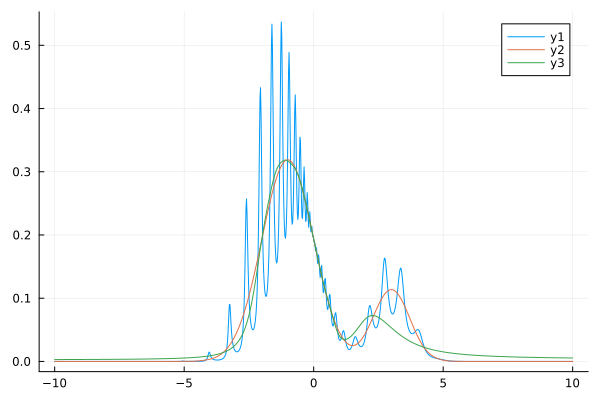

In [15]:
plot()
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val)/pi)
#plot!(real.(f64_wo_sol.reals.freq), imag.(f64_wo_sol.reals.val)/pi)
plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val))/pi)
plot!(Float64.(real.((f64_sol.reals.freq))), Float64.(imag.(f64_sol.reals.val))/pi)
#plot!(omegas, rho.(omegas))
#savefig("picture.png")

In [17]:
plot(xlim = [-6,6],
    legend = :topright,
#    ymirror = true, 
    xticks = [5,0,-5],
    yticks = [0.3,0,-0.3],
    xtickfont=font(15), 
    ytickfont=font(15), 
    guidefont=font(25), 
    legendfont=font(20))
plot!(xlabel=latexstring("\\omega"))
plot!(ylabel=latexstring("\\rho"))
#plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val/pi),label="non-opt",lw=3)
plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val)/pi),label="opt 128bit",lw=3)
plot!(Float64.(real.((f64_sol.reals.freq))), Float64.(imag.(f64_sol.reals.val)/pi),label="opt 64bit",lw=3)
plot!(omegas, rho.(omegas), label="exact",lw=1.5,ls=:dash,lc=:black)
savefig("two_peak_64.svg")

┌ Warning: /home/kosuke/.julia/packages/LogExpFunctions/DckkM/src/chainrules.jl no longer exists, deleted all methods
└ @ Revise ~/.julia/packages/Revise/VRgaS/src/packagedef.jl:658
┌ Warning: /home/kosuke/.julia/packages/LogExpFunctions/DckkM/src/inverse.jl no longer exists, deleted all methods
└ @ Revise ~/.julia/packages/Revise/VRgaS/src/packagedef.jl:658
┌ Warning: /home/kosuke/.julia/packages/LogExpFunctions/DckkM/src/with_logabsdet_jacobian.jl no longer exists, deleted all methods
└ @ Revise ~/.julia/packages/Revise/VRgaS/src/packagedef.jl:658
┌ Error: Failed to revise /home/kosuke/.julia/packages/Bessels/eaWGd/src/Float128/besseli.jl
│   exception =
│    /home/kosuke/.julia/packages/Bessels/eaWGd/src/Float128/besseli.jl is not stored in the source-text cache
│    Stacktrace:
│     [1] error(::String, ::String)
│       @ Base ./error.jl:44
│     [2] _read_dependency_src(io::IOStream, filename::String)
│       @ Base ./loading.jl:1867
│     [3] read_dependency_src
│       @ ./load

"/home/kosuke/work/Nevanlinna.jl/notebooks/two_peak_64.svg"